# PA 1: Exploratory Analysis over 120 years of Olympic History

## Student Details

Student Name and ID: ABHAY SINGH 1001669333

Notes:
When submitting, fill your name and ID in this cell. Note that this is a markdown cell!
Do not make any changes in the dataset file and do not rename the 'athlete_events.csv'.
Rename your submission file to <b> 'yourLastName_Last4digitsofyourID_PA1.ipynb' </b>.
Do not to forget to cite any external sources used by you.
[2.5 points]

Citations and external sources used:
https://seaborn.pydata.org/
https://stackoverflow.com/
https://stackoverflow.com/questions/52002905/color-based-on-categorical-variable-in-python-sns-barplot
https://http://pandas.pydata.org/



## Assignment Details

In this assignment, you will conduct a guided exploration over the Olympic History dataset. You will learn and use some of the most common exploration/aggregation/descriptive operations. This should also help you learn most of the key functionalities in Pandas.

You will also learn how to use visualization libraries to identify patterns in data that will help in your further data analysis. You will also explore most popular chart types and how to use different libraries and styles to make your visualizations more attractive.

## Dataset Details

In this assignment, you will work on 120 years of Olympic History dataset. Specifically, you will work on athlete_events.csv file from kaggle repository (https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results). The file athlete_events.csv contains 271.116 rows and 15 columns. This dataset begins with the 1896 Athens, Greece Olympics, and runs up to the 2016 Rio, Brazil Olympic Games. Each row corresponds to an athlete competing in an individual Olympic event. The columns of the data-set are:

- ID - Unique number for each athlete
- Name - Athlete's name
- Sex - M or F
- Age - Integer
- Height - In centimeters
- Weight - In kilograms
- Team - Team name
- NOC - National Olympic Committee 3-letter code
- Games - Year and season
- Year - Integer
- Season - Summer or Winter
- City - Host city
- Sport - Sport
- Event - Event
- Medal - Gold, Silver, Bronze, or NA

## Required Python Packages
You will use the packages imported below in this assignment. 
Do NOT import any new packages without confirming with the TA. 

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

#Array processing
import numpy as np
#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Dataset
The Python code below reads the Olympic History dataset into a Pandas data frame with the name df_Olympic. 
For this code to work, the file 'athlete_events.csv' must be in the same folder as this file.

In [2]:
#read the csv file into a Pandas data frame
df_olympics = pd.read_csv('athlete_events.csv', encoding='latin1')

#return the first 5 rows of the dataset
df_olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


# Task 1: Statistical Exploratory Data Analysis
Let us start with getting know the dataset. Your first task will be to get some basic information by using Pandas features.

In [13]:
#For each task below, look for a Pandas function to do the task.
#Replace None in each task with your code.

# 2.5 points
#Task 1-a: Print the details of the df_olympics data frame (information such as number of rows,columns, name of columns, etc)
print (">>Task 1-a: Details of df_olympics data frame are: ", df_olympics.describe()) #info(verbose=True)

# 2.5 points
#Task 1-b: Find the number of rows and columns in the df_olympics data frame.
num_rows =  df_olympics.shape[0]
num_cols =  df_olympics.shape[1]
print ("\n\n>>Task 1-b: Number of rows:%s and number of columns:%s" % (num_rows, num_cols)) 

# 2.5 points
#Task 1-c: Print the descriptive detail (min, max, quartiles etc) for 'Age' column of  the df_olympics
print ("\n\n>>Task 1-c: Descriptive details of Age column are\n",df_olympics.Age.describe())

# 10 points
#Task 1-d: Print the number of years from the first game until the last in our data-set, and the number of  unique values for 'games'.
num_tot_years  = df_olympics.Year.max()-df_olympics.Year.min()
num_uniq_games = df_olympics.Games.nunique()
print ("\n\n >>Task 1-d: In our dataset we have historical data for %s years, and for %s games. " % (num_tot_years, num_uniq_games))


>>Task 1-a: Details of df_olympics data frame are:                    ID            Age         Height         Weight  \
count  271116.000000  261642.000000  210945.000000  208241.000000   
mean    68248.954396      25.556898     175.338970      70.702393   
std     39022.286345       6.393561      10.518462      14.348020   
min         1.000000      10.000000     127.000000      25.000000   
25%     34643.000000      21.000000     168.000000      60.000000   
50%     68205.000000      24.000000     175.000000      70.000000   
75%    102097.250000      28.000000     183.000000      79.000000   
max    135571.000000      97.000000     226.000000     214.000000   

                Year  
count  271116.000000  
mean     1978.378480  
std        29.877632  
min      1896.000000  
25%      1960.000000  
50%      1988.000000  
75%      2002.000000  
max      2016.000000  


>>Task 1-b: Number of rows:271116 and number of columns:15


>>Task 1-c: Descriptive details of Age column are
 count

# Task 2: Aggregation & Filtering & Rank
In this task, we will perform some very high level aggregation and filtering operations. 
Then, we will apply ranking on the results for some tasks. 
Pandas has a convenient and powerful syntax for aggregation, filtering, and ranking. 
DO NOT write a for loop. Pandas has built-in functions for all tasks. 

In [99]:
# 8 points
#Task 2-a: Find out the total number of female and male athletes that participated on the 2004 Olympics Games
num_female_2004 = df_olympics[(df_olympics["Year"] == 2004) & (df_olympics["Sex"] == 'F')].Name.unique().shape[0]
num_male_2004   = df_olympics[(df_olympics["Year"] == 2004) & (df_olympics["Sex"] == 'M')].Name.unique().shape[0]
print (">>Task 2-a: At the Olympics of 2004, there were participating %s female and %s male athletes" 
       % (num_female_2004, num_male_2004))

# 8 points
#Task 2-b: Find out the total number of awarded metals for the year 1896, and the year 2016.
#Utilize the property of cell's missing values
num_medals_1986 = df_olympics[(df_olympics["Year"] == 1896)].ID.count() - df_olympics[(df_olympics["Year"] == 1896) & (df_olympics.Medal.isnull()) ].ID.count()
num_medals_2016 = df_olympics[(df_olympics["Year"] == 2016)].ID.count() - df_olympics[(df_olympics["Year"] == 2016) & (df_olympics.Medal.isnull()) ].ID.count()

print ("\n\n>>Task 2-b: The total number of metals awarded in 1896 was %s, while in 2016 was %s" 
       % (num_medals_1986, num_medals_2016))

# 14 points
#Task 2-c: Find out the top 10 athletes with the most gold medals for all years.
top10_gold_athletes=df_olympics[(df_olympics["Medal"] == 'Gold')].Name.value_counts().head(10)
print ("\n\n>>Task 2-c: The top 10 athletes for all years are: \n%s" % (top10_gold_athletes))



>>Task 2-a: At the Olympics of 2004, there were participating 4288 female and 6252 male athletes


>>Task 2-b: The total number of metals awarded in 1896 was 143, while in 2016 was 2023


>>Task 2-c: The top 10 athletes for all years are: 
Michael Fred Phelps, II                            23
Raymond Clarence "Ray" Ewry                        10
Frederick Carlton "Carl" Lewis                      9
Paavo Johannes Nurmi                                9
Mark Andrew Spitz                                   9
Larysa Semenivna Latynina (Diriy-)                  9
Sawao Kato                                          8
Matthew Nicholas "Matt" Biondi                      8
Usain St. Leo Bolt                                  8
Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)     8
Name: Name, dtype: int64


# Task 3: Visualization
In this task, you will perform a number of visualization tasks to get some intuition about the data. Visualization is a key component of exploration. You can choose to use either Matplotlib or Seaborn for plotting. The default figures generated from Matplotlib might look a bit ugly. So you might want to try Seaborn to get better figures. Seaborn has a variety of styles. Feel free to experiment with them and choose the one you like. We have earmarked 10 points for the aesthetics of your visualizations.

/Users/abhaysingh/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


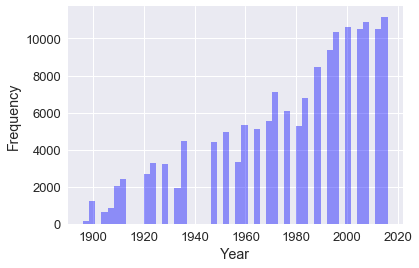

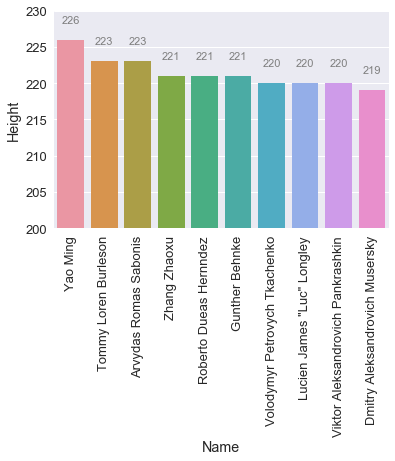

In [122]:
sns.set_style('whitegrid')
sns.set(font_scale = 1.3)

# 15 points
# Task 3-a: Draw a histogram for total number of athletes participated in all Summer Olympic Games. 
# Think of a way to nicely visualize the all years of Summer Olympics! 
#########################begin code for Task 3-a
da1=df_olympics[(df_olympics["Season"] == 'Summer')][['Year','Name']].sort_values(by=['Year'])
da2=da1.drop_duplicates(subset=['Year', 'Name'], keep="first")
da3=da2["Year"]
y=sns.distplot(da3, hist=True, kde=False, color='b')
y.set_ylabel('Frequency')
plt.show()
#########################end code for Task 3-a


# 15 points
# Task 3-b: Draw a "vertical" bar chart that lists the top-10 talest althlets for all years.
# Remember to make the bar chart into a vertical bar chart
#########################begin code for Task 3-b 
db1=df_olympics.sort_values(by=['Height'],ascending=False)
db2=db1.drop_duplicates(subset=['Height', 'Name'], keep="first")
db3=db2.head(10)

ax=sns.barplot(x="Name", y="Height", data=db3)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylim(200, 230)
ax.reset_position()

for p in ax.patches:
             ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')
plt.show()

#########################end code for Task 3-b

# Task 4: 
Find out an 'interesting' information from your Olympic History dataset. Create a visualization for it and explain in a few lines your reasoning. 

This task is worth 20 points. Your result will be judged based on the uniqueness and quality of your work (having a meaningful result and an aesthetic visualization). 


	Top 5 country won most medals in Judo

            Team  No of Medals of the Sport
27         Japan                         84
18        France                         49
41   South Korea                         43
12          Cuba                         36
42  Soviet Union                         23

	Year-wise medals record of top-5 countries in Judo

    Year          Team  No of Medals of the Sport
0   1964         Japan                          4
1   1964   South Korea                          1
2   1964  Soviet Union                          4
3   1972        France                          3
4   1972         Japan                          4
5   1972   South Korea                          1
6   1972  Soviet Union                          4
10  1976   South Korea                          3
9   1976         Japan                          5
11  1976  Soviet Union                          5
7   1976          Cuba                          1
8   1976        France                   

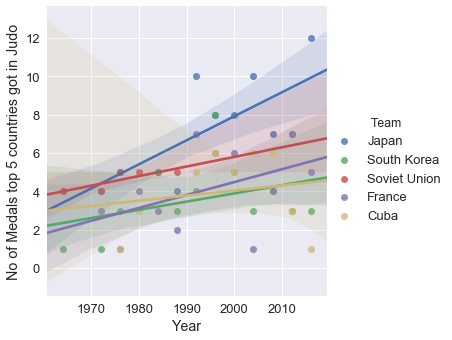

<Figure size 57600x43200 with 0 Axes>

From the following graph, we can conclude that the performance of country with positive slope has been significantly improved by winning more medals every year(in the case of Judo, its JAPAN) and based of the following data we can predict that the possibility of getting more medals in the Next Olympics 2020 in Tokyo will be won by following team.


In [162]:
#########################begin code for Task 4
sport='Judo'            #Please update the sport for example [Basketball, Judo, Football, Swimming, Badminton]

print("\n\tTop 5 country won most medals in "+sport+"\n")
df=df_olympics[(df_olympics["Sport"] == sport)]
da=df[df.Medal.notnull()]
axa=da.groupby(['Team']).size().to_frame('No of Medals of the Sport')
axa2=axa.reset_index()
axa3=axa2.sort_values(['No of Medals of the Sport'], ascending=False)
axa4=axa3.head(5)
s=axa4.Team
print(axa4)


print("\n\tYear-wise medals record of top-5 countries in "+sport+"\n")
df2=df_olympics[(df_olympics["Sport"] == sport) & (df_olympics["Team"].isin(s))]
da2=df2[df2.Medal.notnull()]
ax2=da2.groupby(['Year','Team']).size().to_frame('No of Medals of the Sport')
ax3=ax2.reset_index()
ax4=ax3.sort_values(['Year'], ascending=True)
print(ax4)

graph=sns.lmplot(x='Year', y='No of Medals of the Sport', hue='Team', data=ax4)
graph.set_ylabels('No of Medals top 5 countries got in '+sport)
plt.show()
print("From the following graph, we can conclude that the performance of country with positive slope has been significantly improved by winning more medals every year(in the case of Judo, its JAPAN) and based of the following data we can predict that the possibility of getting more medals in the Next Olympics 2020 in Tokyo will be won by following team.")
#########################end code for Task 4